In [1]:
import pandas as pd
import raw_to_def as rtd
import os
# let us test set b
train_path = '../data/dataset/set-a'
train_label_path = '../data/dataset/Outcomes-a.txt'

files = [f for f in os.listdir(train_path) if f.endswith(".txt")]
files.sort()

patient_data =[]
patient_outcomes =[]

for i in enumerate(files):
    data_path = os.path.join(train_path, files[i[0]])
    patient_data.append( pd.read_csv(data_path))
df = rtd.raw_to_df(patient_data)


patient_outcomes = pd.read_csv(train_label_path)
Mortality_labels = patient_outcomes["In-hospital_death"]
Mortality_labels


df

,RecordID,Age,Gender,ICUType,Height,Albumin,ALP,ALT,AST,Bilirubin,...,Platelets,RespRate,SaO2,SysABP,Temp,TroponinI,TroponinT,Urine,WBC,Weight
0,132539.0,54.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,185.0,732.0,NaN,NaN,37.8,NaN,NaN,6500.0,20.6,NaN
1,132540.0,76.0,1.0,2.0,175.3,NaN,NaN,NaN,NaN,NaN,...,135.0,NaN,581.0,7712.0,37.1,NaN,NaN,6214.0,33.8,81.6
2,132541.0,44.0,0.0,3.0,NaN,5.0,232.0,166.0,399.0,5.8,...,113.0,NaN,95.0,2011.0,37.2,NaN,NaN,5123.0,14.1,56.7
3,132543.0,68.0,1.0,3.0,180.3,4.4,105.0,12.0,15.0,0.2,...,284.0,912.0,NaN,NaN,37.0,NaN,NaN,3275.0,28.2,84.6
4,132545.0,88.0,0.0,3.0,NaN,3.3,NaN,NaN,NaN,NaN,...,97.0,920.0,NaN,NaN,36.7,NaN,NaN,2361.0,8.6,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,142665.0,70.0,0.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,...,218.0,NaN,NaN,6096.0,36.9,NaN,NaN,1980.0,29.0,87.0
3996,142667.0,25.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,...,118.0,388.0,NaN,NaN,36.8,NaN,NaN,4675.0,14.2,166.4
3997,142670.0,44.0,1.0,3.0,NaN,NaN,51.0,20.0,20.0,0.5,...,229.0,NaN,NaN,754.0,38.4,NaN,NaN,4193.0,33.2,109.0
3998,142671.0,37.0,1.0,3.0,NaN,3.1,507.0,5913.0,5056.0,2.2,...,314.0,NaN,NaN,8664.0,37.4,NaN,NaN,146.0,52.1,87.4


In [2]:
df['MechVent']

0       False
1         1.0
2         1.0
3       False
4       False
        ...  
3995      1.0
3996    False
3997      1.0
3998      1.0
3999      1.0
Name: MechVent, Length: 4000, dtype: object

## Testing SimpleImputer Vs. IterativeImputer

In [3]:
# from sklearn.impute import SimpleImputer
# from sklearn.experimental import enable_iterative_imputer
# from sklearn.impute import IterativeImputer

# iterative_imp = IterativeImputer(random_state=0)
# X = df.drop(columns=['RecordID'])  # drop ID from features
# X_iteratively_imputed = iterative_imp.fit_transform(X)
# iter_imputed_df = pd.DataFrame(X_iteratively_imputed,columns = X.columns)
# iter_imputed_df

In [4]:
# imputer = SimpleImputer(strategy='median')  # You can try 'median' or 'most_frequent' too
# X = df.drop(columns=['RecordID'])  # drop ID from features
# X_simply_imputed = imputer.fit_transform(X)
# simple_imputed_df = pd.DataFrame(X_simply_imputed,columns = X.columns)
# simple_imputed_df


## Adding oversampling techniques for better test results

In [5]:
# from imblearn.over_sampling import ADASYN
# adasyn = ADASYN(random_state=0)
# X_iter, y_iter = adasyn.fit_resample(iter_imputed_df, Mortality_labels)
# X_simple, y_simple = adasyn.fit_resample(simple_imputed_df, Mortality_labels)

## Cross-validation testing

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


Average Accuracy: 0.8386
Average Precision: 0.3996
Average Recall: 0.3189
Average F1 Score: 0.3539
Average Se (Sensitivity): 0.3189
Average +P (Positive Predictivity): 0.3996
Average Score1 (min(Se, +P)): 0.3189
Aggregated Confusion Matrix:
 [[6355  535]
 [ 756  354]]


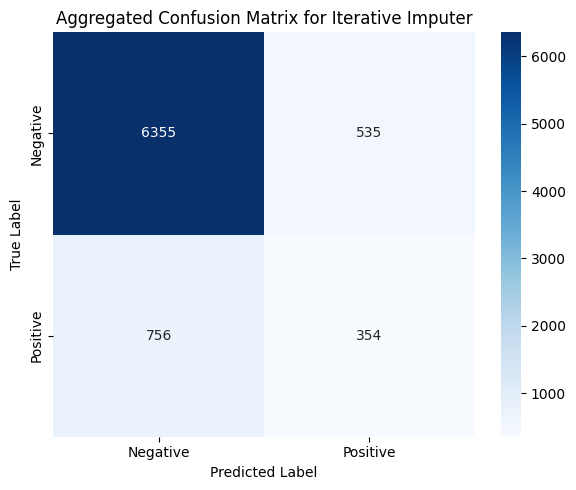

In [16]:
# Iterative Imputer
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
import numpy as np
from sklearn.neural_network import MLPClassifier


adasyn = ADASYN(random_state=42)
clf = RandomForestClassifier(random_state=42)

accs, precs, recalls, f1s = [], [], [], []
Se_list, Ppos_list, Score1_list = [], [], []
conf_matrix_sum = np.zeros((2, 2), dtype=int)

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=['RecordID']), Mortality_labels, test_size=0.2,
        stratify=Mortality_labels, random_state=42 + i
    )
    iterative_imp = IterativeImputer(random_state=0)
    X_train_imp = iterative_imp.fit_transform(X_train)
    X_test_imp = iterative_imp.transform(X_test)
    X_resampled, y_resampled = adasyn.fit_resample(X_train_imp, y_train)
    clf.fit(X_resampled, y_resampled)    
    y_pred = clf.predict(X_test_imp)
    
    accs.append(accuracy_score(y_test, y_pred))
    precs.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    f1s.append(f1_score(y_test, y_pred, zero_division=0))
    
    # Confusion matrix: [[TN, FP], [FN, TP]]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix_sum += np.array([[tn, fp], [fn, tp]])
    
    # Challenge metrics
    Se = tp / (tp + fn) if (tp + fn) > 0 else 0
    Ppos = tp / (tp + fp) if (tp + fp) > 0 else 0
    Score1 = min(Se, Ppos)
    
    Se_list.append(Se)
    Ppos_list.append(Ppos)
    Score1_list.append(Score1)

print("Average Accuracy: {:.4f}".format(np.mean(accs)))
print("Average Precision: {:.4f}".format(np.mean(precs)))
print("Average Recall: {:.4f}".format(np.mean(recalls)))
print("Average F1 Score: {:.4f}".format(np.mean(f1s)))

print("Average Se (Sensitivity): {:.4f}".format(np.mean(Se_list)))
print("Average +P (Positive Predictivity): {:.4f}".format(np.mean(Ppos_list)))
print("Average Score1 (min(Se, +P)): {:.4f}".format(np.mean(Score1_list)))

print("Aggregated Confusion Matrix:\n", conf_matrix_sum)

import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Negative', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_sum, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Aggregated Confusion Matrix for Iterative Imputer')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()


Average Accuracy: 0.8448
Average Precision: 0.4306
Average Recall: 0.3423
Average F1 Score: 0.3795
Average Se (Sensitivity): 0.3423
Average +P (Positive Predictivity): 0.4306
Average Score1 (min(Se, +P)): 0.3423
Aggregated Confusion Matrix:
 [[6378  512]
 [ 730  380]]


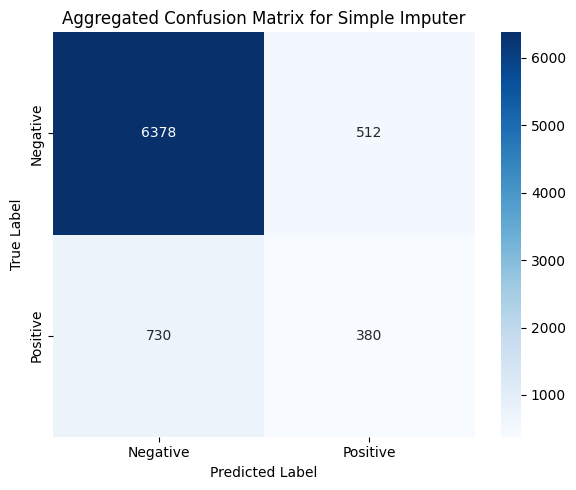

In [15]:
# Simple Imputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import ADASYN
import numpy as np

adasyn = ADASYN(random_state=42)
clf = RandomForestClassifier(random_state=42)

accs, precs, recalls, f1s = [], [], [], []
Se_list, Ppos_list, Score1_list = [], [], []
conf_matrix_sum = np.zeros((2, 2), dtype=int)

for i in range(10):
    X_train, X_test, y_train, y_test = train_test_split(
        df.drop(columns=['RecordID']), Mortality_labels, test_size=0.2,
        stratify=Mortality_labels, random_state=42 + i
    )
    simpleimputer = SimpleImputer(strategy='most_frequent')
    X_train_smp = simpleimputer.fit_transform(X_train)
    X_test_smp = simpleimputer.transform(X_test)
    X_resampled, y_resampled = adasyn.fit_resample(X_train_smp, y_train)
    clf.fit(X_resampled, y_resampled)    
    y_pred = clf.predict(X_test_smp)
    
    accs.append(accuracy_score(y_test, y_pred))
    precs.append(precision_score(y_test, y_pred, zero_division=0))
    recalls.append(recall_score(y_test, y_pred, zero_division=0))
    f1s.append(f1_score(y_test, y_pred, zero_division=0))
    
    # Confusion matrix: [[TN, FP], [FN, TP]]
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    conf_matrix_sum += np.array([[tn, fp], [fn, tp]])
    
    # Challenge metrics
    Se = tp / (tp + fn) if (tp + fn) > 0 else 0
    Ppos = tp / (tp + fp) if (tp + fp) > 0 else 0
    Score1 = min(Se, Ppos)
    
    Se_list.append(Se)
    Ppos_list.append(Ppos)
    Score1_list.append(Score1)

print("Average Accuracy: {:.4f}".format(np.mean(accs)))
print("Average Precision: {:.4f}".format(np.mean(precs)))
print("Average Recall: {:.4f}".format(np.mean(recalls)))
print("Average F1 Score: {:.4f}".format(np.mean(f1s)))

print("Average Se (Sensitivity): {:.4f}".format(np.mean(Se_list)))
print("Average +P (Positive Predictivity): {:.4f}".format(np.mean(Ppos_list)))
print("Average Score1 (min(Se, +P)): {:.4f}".format(np.mean(Score1_list)))

print("Aggregated Confusion Matrix:\n", conf_matrix_sum)


import matplotlib.pyplot as plt
import seaborn as sns

labels = ['Negative', 'Positive']

plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix_sum, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)
plt.title('Aggregated Confusion Matrix for Simple Imputer')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()



#### Models to use




✅ 1. Perceptron
##

from sklearn.linear_model import Perceptron
## 
✅ 2. Fisher’s Linear Discriminant (LDA)
##

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
##
✅ 3. Least Squares (Linear Regression for classification)
##

from sklearn.linear_model import RidgeClassifier  # or LogisticRegression for binary classification
##

✅ 4. Naive Bayes
##

from sklearn.naive_bayes import GaussianNB  # For continuous data
or
##

from sklearn.naive_bayes import MultinomialNB  # For count data
##

✅ 5. Non-Naive Bayes (e.g., Bayesian Ridge, or more advanced Bayes classifiers)
##

from sklearn.linear_model import BayesianRidge  # Not a classifier, but for regression
##

For non-naive Bayesian classifiers, you'd often use custom probabilistic models or PyMC3.
##

✅ 6. Logistic Regression
##

from sklearn.linear_model import LogisticRegression
##

✅ 7. K-Nearest Neighbors (KNN)
##

from sklearn.neighbors import KNeighborsClassifier
##

✅ 8. Support Vector Machines (SVM)
##

from sklearn.svm import SVC
##

✅ 9. Decision Trees
from sklearn.tree import DecisionTreeClassifier
##

✅ 10. Gradient Boosting
##

from sklearn.ensemble import GradientBoostingClassifier
or better:
from xgboost import XGBClassifier
##

✅ 11. Random Forest
##

from sklearn.ensemble import RandomForestClassifier
##

✅ 12. Artificial Neural Networks (ANN)
##

import torch
import torch.nn as nn